# Exploratory Data Analysis - ACN Dataset


In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [3]:
ev_json = json.load(open('./Datasets/acndata_sessions_CalTech.json','r'))
ev_df = pd.DataFrame(ev_json['_items'])
ev_df.drop(ev_df.index[ev_df['doneChargingTime'].values==None],inplace=True)
ev_df.reset_index(inplace=True,drop=True)

In [4]:
ev_df[['connectionTime','disconnectTime','doneChargingTime']] = ev_df[['connectionTime','disconnectTime','doneChargingTime']].apply(pd.to_datetime)

In [5]:
ev_df.drop(columns=['_id','clusterID','sessionID',
                    'timezone','userInputs','userID'],inplace=True)

In [12]:
ev_df['chargeTime'] = (ev_df['doneChargingTime'] - ev_df['connectionTime']).values.astype(float)/(36*1e11)
ev_df['parkTime'] = (ev_df['disconnectTime'] - ev_df['connectionTime']).values.astype(float)/(36*1e11)

In [13]:
ev_df.tail()

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,spaceID,stationID,chargeTime,parkTime
27937,2021-05-01 00:12:07+00:00,2021-05-01 05:04:23+00:00,2021-05-01 05:04:19+00:00,33.313,0002,CA-319,2-39-95-27,4.870000,4.871111
27938,2021-05-01 19:01:17+00:00,2021-05-01 19:16:04+00:00,2021-05-01 19:15:54+00:00,0.905,0002,CA-327,2-39-79-379,0.243611,0.246389
27939,2021-05-01 19:55:08+00:00,2021-05-02 01:33:15+00:00,2021-05-01 20:26:03+00:00,0.732,0002,CA-327,2-39-79-379,0.515278,5.635278
27940,2021-05-01 20:02:06+00:00,2021-05-01 21:40:51+00:00,2021-05-01 20:31:31+00:00,1.188,0002,CA-316,2-39-90-26,0.490278,1.645833
27941,2021-05-01 21:56:16+00:00,2021-05-01 22:40:48+00:00,2021-05-01 22:40:43+00:00,2.476,0002,CA-311,2-39-125-21,0.740833,0.742222


In [125]:
ev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27942 entries, 0 to 27941
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   connectionTime    27942 non-null  datetime64[ns, UTC]
 1   disconnectTime    27942 non-null  datetime64[ns, UTC]
 2   doneChargingTime  27942 non-null  datetime64[ns, UTC]
 3   kWhDelivered      27942 non-null  float64            
 4   siteID            27942 non-null  object             
 5   spaceID           27942 non-null  object             
 6   stationID         27942 non-null  object             
 7   chargeTime        27942 non-null  timedelta64[ns]    
 8   parkTime          27942 non-null  timedelta64[ns]    
dtypes: datetime64[ns, UTC](3), float64(1), object(3), timedelta64[ns](2)
memory usage: 1.9+ MB


In [14]:
ev_df['chargeRate'] = ev_df['kWhDelivered']/ev_df['chargeTime']

In [15]:
ev_df = ev_df.set_index('connectionTime')

<AxesSubplot:xlabel='connectionTime'>

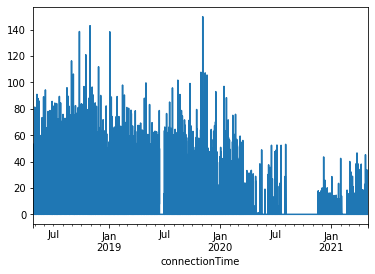

In [19]:
ev_df_quarterly = ev_df.resample('15T').sum()
ev_df_quarterly.kWhDelivered.plot()

In [20]:
ev_df_quarterly.head()

,kWhDelivered,chargeTime,parkTime,chargeRate
connectionTime,,,,
2018-04-25 11:00:00+00:00,7.932,2.218333,2.201667,3.575657
2018-04-25 11:15:00+00:00,0.000,0.000000,0.000000,0.000000
2018-04-25 11:30:00+00:00,0.000,0.000000,0.000000,0.000000
2018-04-25 11:45:00+00:00,0.000,0.000000,0.000000,0.000000
2018-04-25 12:00:00+00:00,0.000,0.000000,0.000000,0.000000


<AxesSubplot:xlabel='connectionTime'>

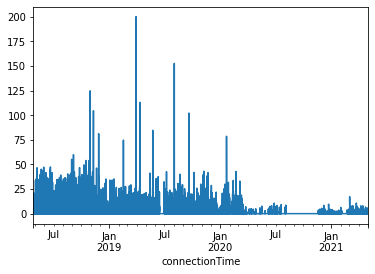

In [21]:
ev_df_quarterly.chargeTime.plot()